In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

### K-means и K-means++

Исследуем, как стратегия инициализации центроид влияет на производительность алгоритма

1. Берем k первых точек
2. k-means++



#### Нахождение центроид в k-means++

Первый центроид берем как и раньше - нулевой элемент датасета

##### Для остальных центроид используем данный алгоритм:
1. Для каждой точки находим значение квадрата расстояния до ближайшего центроида
2. Выбираем из этих точек следующий центроид так, чтобы вероятность выбора точки была пропорциональна вычисленному для неё квадрату расстояния

Наблюдения: k-means++ значительно сокращает количество итераций алгоритма, но в некоторых случаях оптимальнее взять k случайных точек (например, если количество кластеров достаточно большое)


Сгенерируем искусственно 3 кластера случайных точек.

In [79]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state = 0)

In [5]:
import sys 

def k_means(points, num_clusters, kmeanspp=False, showIter=True):
    num_points = len(points)
    centers = [] 
    if kmeanspp:
        centers = [points[0]]

        for _ in range(1, num_clusters):
            dist_sq = np.array([min([np.inner(c-x,c-x) for c in centers]) for x in points])
            probs = dist_sq/dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()
        
            for j, p in enumerate(cumulative_probs):
                if r < p:
                    i = j
                    break
        
            centers.append(points[i])
    else:
        centers = points[:num_clusters]

    result = []
    prev_result = None
    
    print("Входные данные")
    points_x = list(map(lambda x: x[0], points))
    points_y = list(map(lambda x: x[1], points))
    plt.scatter(x=points_x, y=points_y)
    plt.show()
    
    it_num = 1

    while result != prev_result:

        prev_result = list(result)
        result = []
        
        for point in range (len(points)):
            dist = None
            dist_num = -1

            for i in range (num_clusters):
                dist_x = (points[point][0] - centers[i][0]) ** 2
                dist_y = (points[point][1] - centers[i][1]) ** 2
                new_dist = math.sqrt(dist_x + dist_y)
                
                if dist == None or new_dist < dist:
                    dist = new_dist   
                    dist_num = i
                                        
            result.append(dist_num)
        
            
                
        centers = []
                
        for i in range (num_clusters):
            n = 0
            sum_x = 0
            sum_y = 0
            
            for coord_index in range (len(result)):
                if result[coord_index] == i:
                    sum_x += points[coord_index][0]
                    sum_y += points[coord_index][1]
                    n += 1
            
            centers.append([sum_x/n, sum_y/n])
                
            
        it_num += 1
        if showIter:
            print("Итерация №{}".format(it_num))
            points_x = list(map(lambda x: x[0], points))
            points_y = list(map(lambda x: x[1], points))    
            plt.scatter(x=points_x, y=points_y, c=result)
            plt.show()
    if not showIter:
      print("Результат")
      points_x = list(map(lambda x: x[0], points))
      points_y = list(map(lambda x: x[1], points))    
      plt.scatter(x=points_x, y=points_y, c=result)
      plt.show()
      print('Количество итераций:', it_num)
    return result, centers    

Входные данные


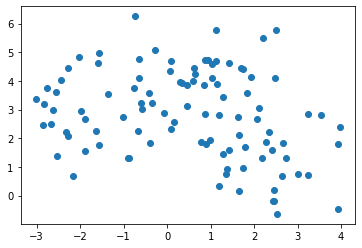

Итерация №2


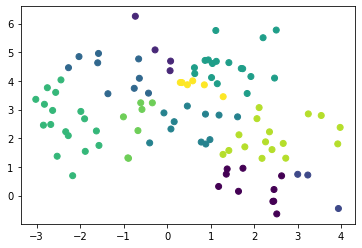

Итерация №3


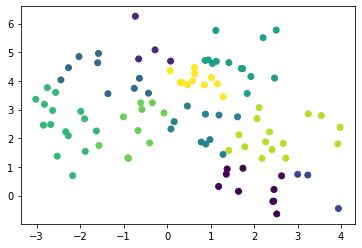

Итерация №4


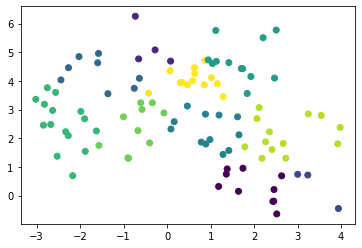

Итерация №5


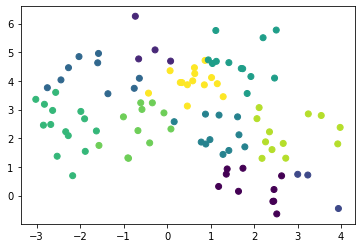

Итерация №6


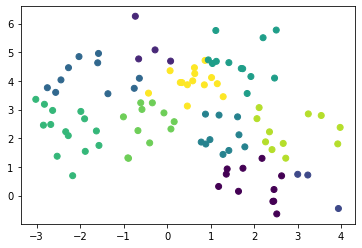

Итерация №7


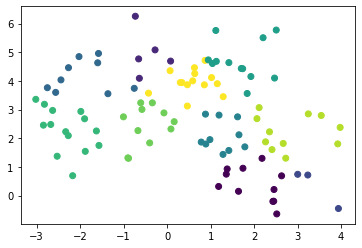

Итерация №8


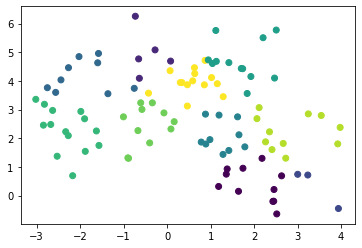

CPU times: user 1.33 s, sys: 29.1 ms, total: 1.36 s
Wall time: 1.36 s


In [80]:
%%time
res, centers = k_means(points, 10)

Входные данные


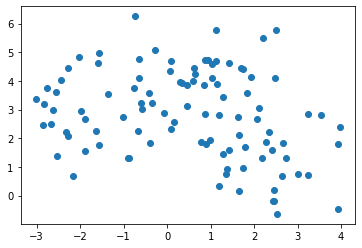

Итерация №2


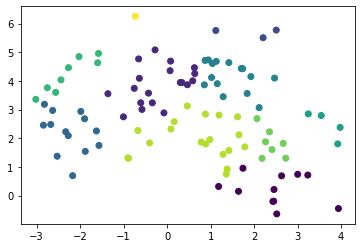

Итерация №3


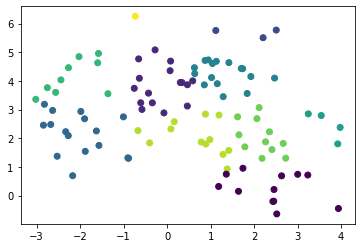

Итерация №4


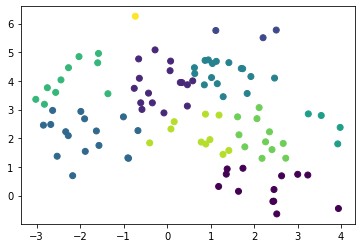

Итерация №5


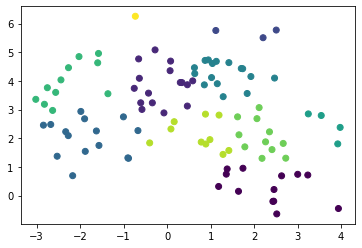

Итерация №6


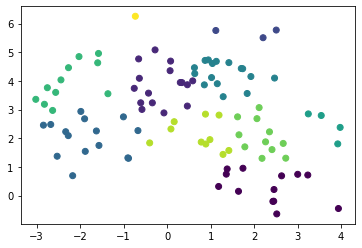

CPU times: user 1.11 s, sys: 23.2 ms, total: 1.14 s
Wall time: 1.12 s


In [81]:
%%time
res, centers = k_means(points, 10, kmeanspp=True)

А теперь посмотрим на разницу при более существенном количестве точек

In [86]:
points, y = make_blobs(n_samples=35000, n_features=2, centers=8, random_state = 0)

Входные данные


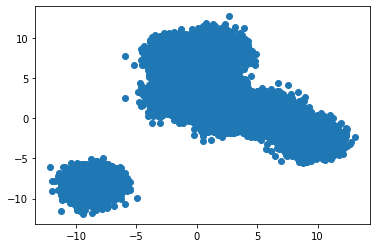

Результат


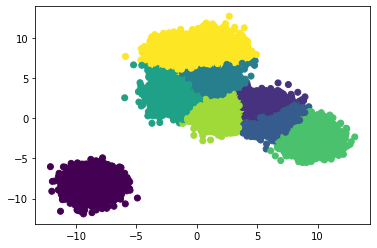

Количество итераций: 44
CPU times: user 28.4 s, sys: 20 ms, total: 28.4 s
Wall time: 28.5 s


In [87]:
%%time
res, centers = k_means(points, 8, showIter=False)

Входные данные


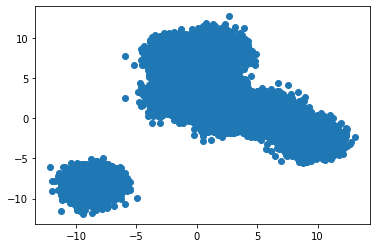

Результат


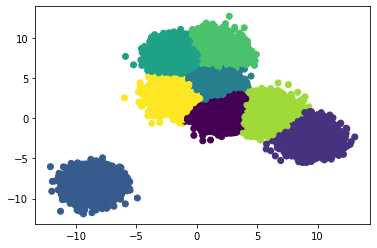

Количество итераций: 20
CPU times: user 16 s, sys: 21.4 ms, total: 16 s
Wall time: 16 s


In [88]:
%%time
res, centers = k_means(points, 8, showIter=False, kmeanspp=True)

Также мною была изучена работа [The Advantages of Careful Seeding](https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf) Дэвида Артура и Сергея Вассильвитского, Алгоритм k-means++ был предложен ими в 2007 году. Согласно их сравнению, k-means++ может в 10 раз превосходить k-means по скорости

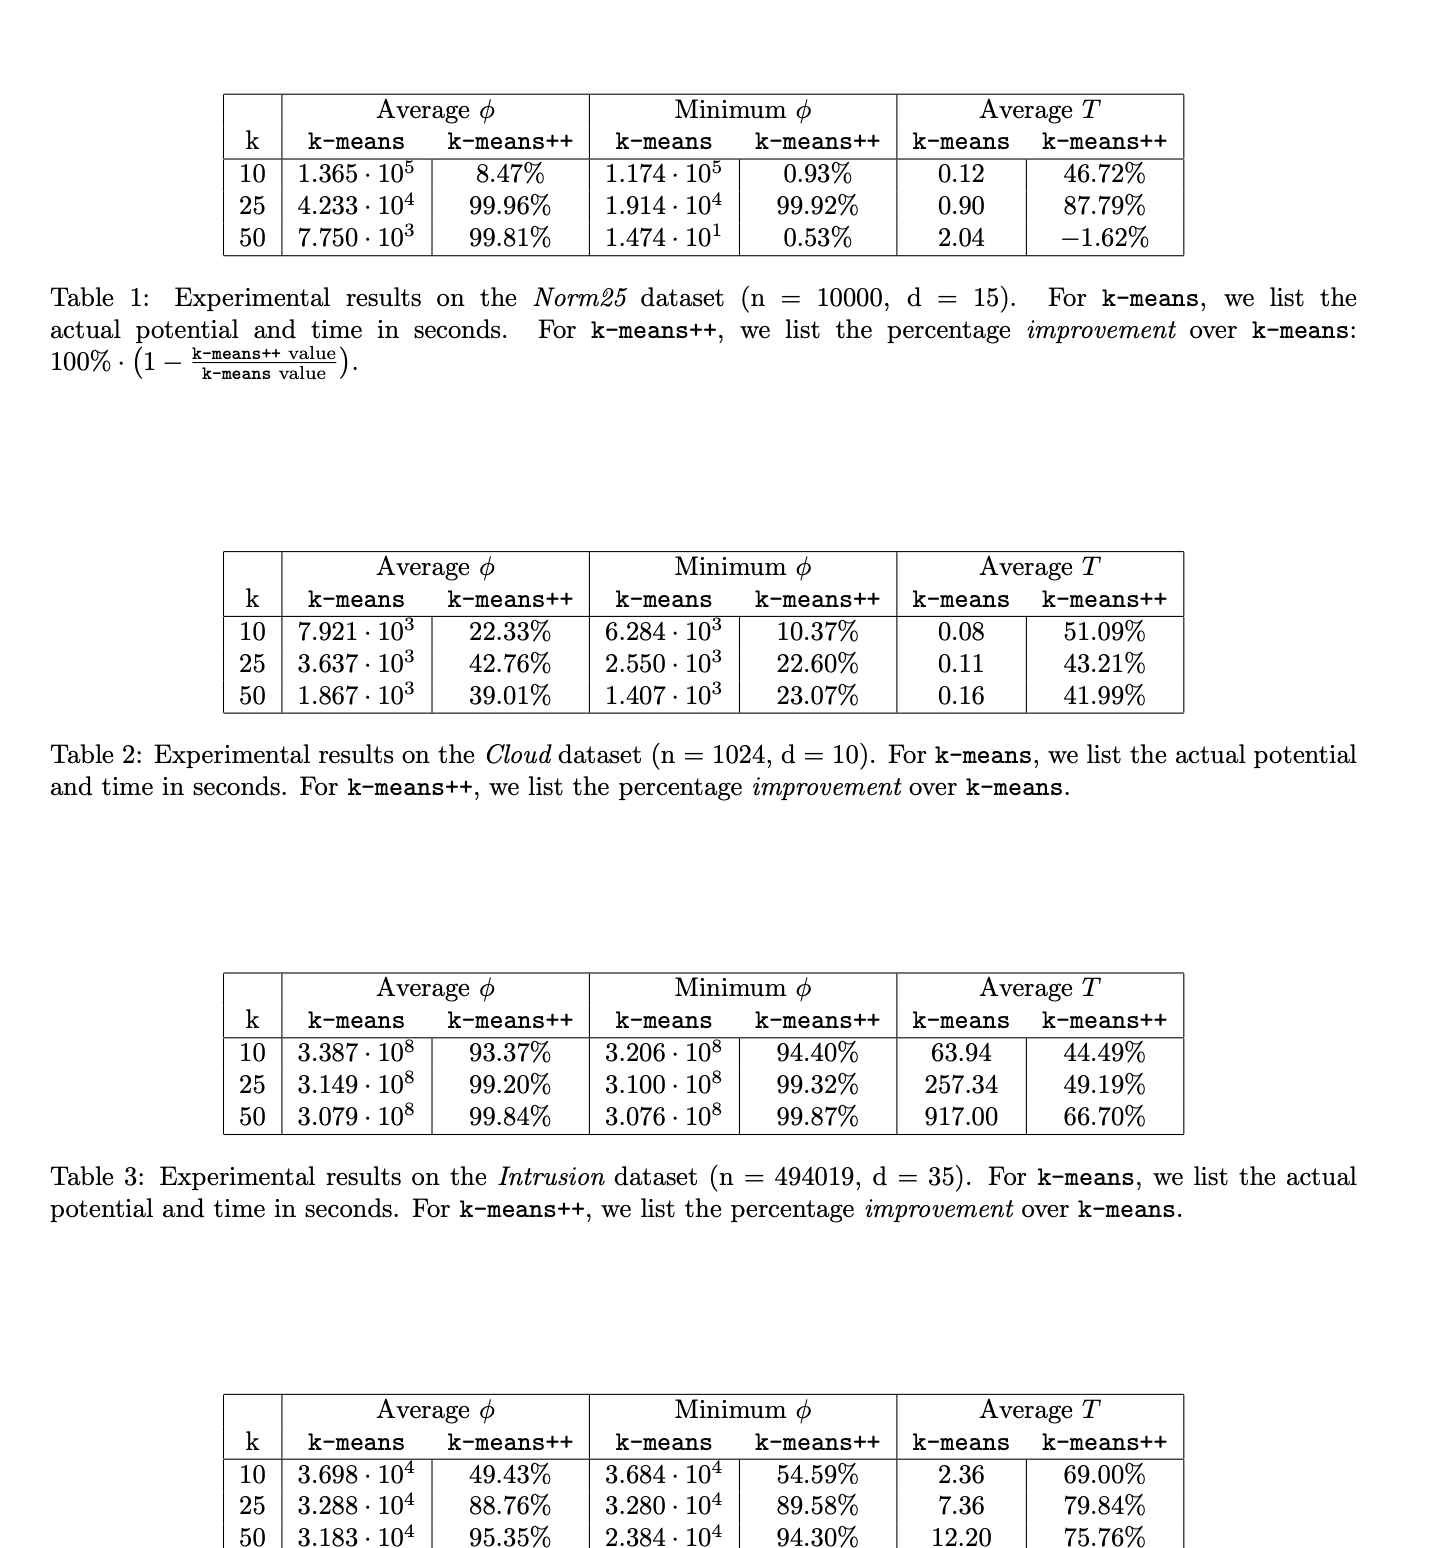



#### На каких датасетах использовать k-means — бессмысленно? 

Рассмотрим датасет: 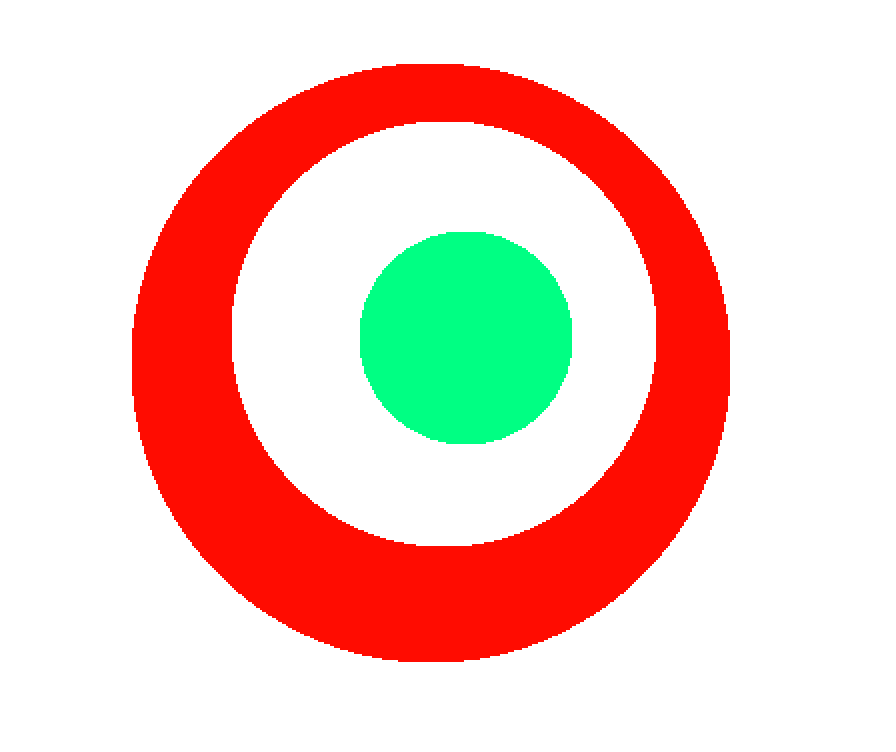

Входные данные


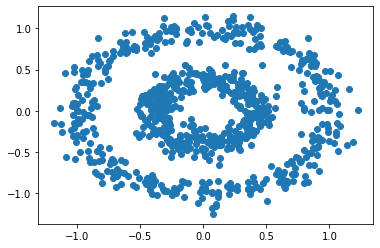

Результат


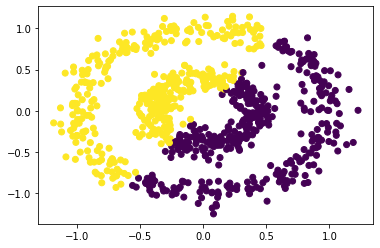

Количество итераций: 13


In [29]:
from sklearn.datasets import make_circles
points, y = make_circles(n_samples=800, shuffle=True, noise=0.09, random_state=2, factor=0.4)
  

res, centers = k_means(points, 2, showIter=False)

До этого мы рассматривали хорошо отделимые друг от друга кластеры. 

Но если кластеры вложены друг в друга, с помощью k-means разделить их так, чтобы можно было бы выявить определенную закономерность, не получится.

### 4. Зависимость скорости настройки от объема данных

http://theory.stanford.edu/~sergei/papers/kMeans-socg.pdf

От Ω(n) до 2Ω(√n) итераций, где n - данные точки 



In [32]:
from sklearn.datasets import make_blobs

points, y = make_blobs(n_samples=35000, n_features=2, centers=8, random_state = 4)

Входные данные


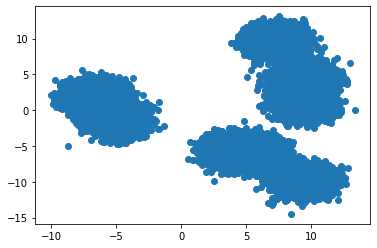

Результат


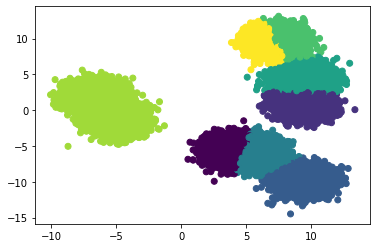

Количество итераций: 27
CPU times: user 17.2 s, sys: 11.1 ms, total: 17.2 s
Wall time: 17.2 s


In [33]:
%%time
res, centers = k_means(points, 8, showIter=False)

Входные данные


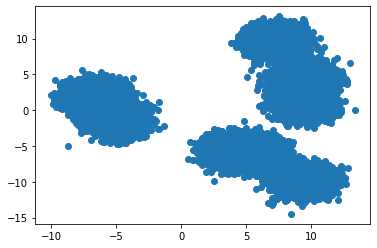

Результат


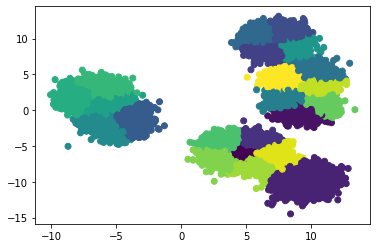

Количество итераций: 140
CPU times: user 3min 51s, sys: 27.2 ms, total: 3min 51s
Wall time: 3min 51s


In [34]:
%%time
res, centers = k_means(points, 22, showIter=False)

In [35]:
points, y = make_blobs(n_samples=5000, n_features=2, centers=8, random_state = 4)

Входные данные


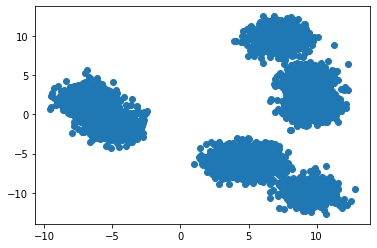

Результат


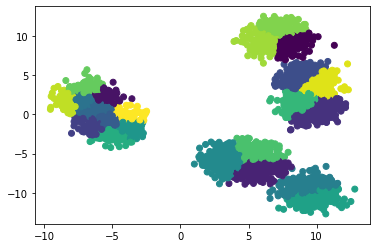

Количество итераций: 50
CPU times: user 11.8 s, sys: 13.9 ms, total: 11.9 s
Wall time: 11.9 s


In [36]:
%%time
res, centers = k_means(points, 22, showIter=False)

Входные данные


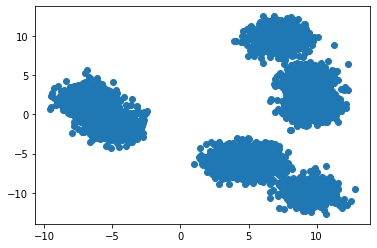

Результат


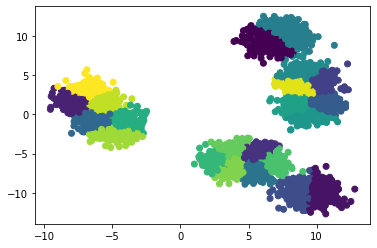

Количество итераций: 40
CPU times: user 12.6 s, sys: 3.98 ms, total: 12.6 s
Wall time: 12.6 s


In [37]:
%%time
res, centers = k_means(points, 22, showIter=False, kmeanspp=True)

Входные данные


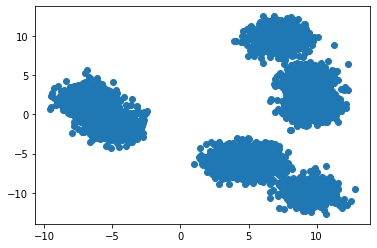

Результат


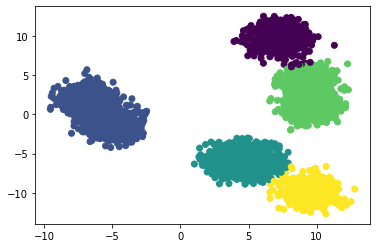

Количество итераций: 6
CPU times: user 890 ms, sys: 7.02 ms, total: 897 ms
Wall time: 898 ms


In [42]:
%%time
res, centers = k_means(points, 5, showIter=False, kmeanspp=True)

Стратегия выбора количества кластеров

Так в sklearn описывается [Метод “локтя”](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#:~:text=The%20elbow%20method%20runs%20k,point%20to%20its%20assigned%20center.), который помогает выбрать количество кластеров 

Метод “локтя” рассматривает характер изменения разброса с увеличением числа групп k. Объединив все n наблюдений в одну группу, мы имеем наибольшую внутрикластерную дисперсию, которая будет снижаться до 0 при k→n. На каком-то этапе можно усмотреть, что снижение этой дисперсии замедляется - на графике это происходит в точке, называемой “локтем”

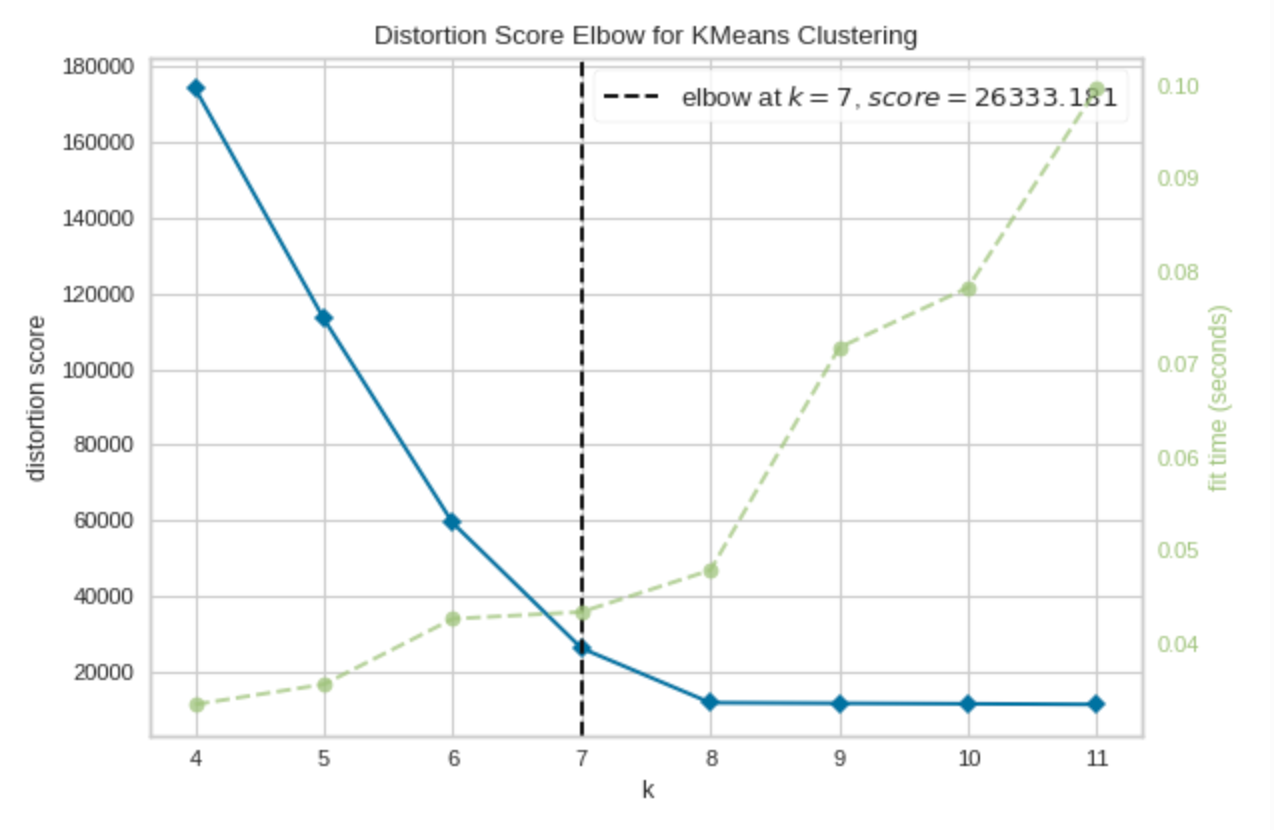